## Part 1: Fundamentals

### Fundamental terms in portfolio optimization 
- (notes from https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/#optimal-risky-portfolio)

There are some statistical terms required in optimization process without which an optimal portfolio can’t be defined. Don’t worry, I will simplify it and make it easy and clear.

We will go through each one through an example.

In this example, we are considering a portfolio made up of stocks from just 2 companies, Tesla and Facebook.

Step 1: Pull the stock price data

The first step is to is to pull the required data from a verified site such as Yahoo or Quandl. The example below uses Yahoo and the dates for which we will be pulling the data is from 1st January, 2018 to 31st December, 2019.

In [25]:
# Load Packages
import numpy as np
import yfinance as yf
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

# input 1: Tickers

In [52]:
# Create a list of tickers
tickers = [
'TSLA',
'AAPL',
'MSFT',
'ARKK',
'AMZN',
'GOOG',
'NFLX', 
'NVDA',
'META',
'SPY',
'IWM',
'BABA',
'V',
'VOO',
'ARKQ',
'ETH-USD', 
'BTC-USD', 
'MIDAS-USD', 
'DOGE-USD', 
'AVAX-USD', 
'DOT-USD',
'ADA-USD',
'XRP-USD',
'UNI-USD',
'LINK-USD',
'AAVE-USD',
'BNB-USD',
'PYR-USD', 
'MATIC-USD']

### Input start and end date variables and assign dates 

# startDate = '2015/01/10'
# endDate = '2022/10/31'

startDate='2015-01-10'
endDate='2022-10-31'

### Input available capital to invest 
capital = 10000

### Input the number of assets to keep 
numOfAssets = 11
 


In [32]:
# TODO 
# 1. Create a new for loop to iterate through the number of assets to keep and determine the optimal number of assets to keep
# 2. Create streamlit application for to display the results 
# 3. Make streamlit application interactive so that one can choose the inputs and see the results

### Building an optimal risky portfolio

You will learn to calculate the weights of assets for each one. Then, we will calculate the expected returns, minimum variance portfolio, optimal risky portfolio and efficient frontier. You will also learn a new term called Sharpe Ratio.

Let’s get started by pulling the required asset data from Yahoo.

# input 2: Start and end dates

In [44]:
### Import data ###
# write code to import data from yahoo finance

df = data.DataReader(tickers, 'yahoo', start=startDate, end=endDate) 
df.head()


TypeError: string indices must be integers

In [54]:
df = yf.download(tickers, start=startDate, end=endDate)


# pass datetime index to pandas dataframe
df = pd.DataFrame(df)
df

[*********************100%***********************]  29 of 29 completed


Adj Close                                                         \
                  AAPL   AAVE-USD   ADA-USD        AMZN       ARKK       ARKQ   
Date                                                                            
2015-01-10         NaN        NaN       NaN         NaN        NaN        NaN   
2015-01-11         NaN        NaN       NaN         NaN        NaN        NaN   
2015-01-12   24.585201        NaN       NaN   14.570500  18.335602  17.637247   
2015-01-13   24.803490        NaN       NaN   14.737000  18.190008  17.525326   
2015-01-14   24.708971        NaN       NaN   14.663500  18.135410  17.366768   
...                ...        ...       ...         ...        ...        ...   
2022-10-27  144.560196  81.583633  0.388697  110.959999  37.869999  45.730000   
2022-10-28  155.482086  84.178490  0.404507  103.410004  38.889999  46.900002   
2022-10-29         NaN  85.305183  0.419778         NaN        NaN        NaN   
2022-10-30         NaN  83.935753  0.406047         NaN        NaN        NaN   
2022-10-31         NaN  83.951302  0.406336         NaN        NaN        NaN   

                                                             ...      Volume  \
             AVAX-USD        BABA     BNB-USD       BTC-USD  ...        MSFT   
Date                                                         ...               
2015-01-10        NaN         NaN         NaN    274.795990  ...         NaN   
2015-01-11        NaN         NaN         NaN    265.660004  ...         NaN   
2015-01-12        NaN  101.620003         NaN    267.795990  ...  23651900.0   
2015-01-13        NaN  100.769997         NaN    225.860992  ...  35270600.0   
2015-01-14        NaN   99.580002         NaN    178.102997  ...  29719600.0   
...               ...         ...         ...           ...  ...         ...   
2022-10-27  16.913971   65.839996  286.844116  20285.835938  ...  40424600.0   
2022-10-28  18.340309   63.740002  298.014191  20595.351562  ...  40647700.0   
2022-10-29  18.307974         NaN  304.217957  20818.476562  ...         NaN   
2022-10-30  18.265606         NaN  313.754791  20635.603516  ...         NaN   
2022-10-31  19.311609         NaN  326.360718  20495.773438  ...         NaN   

                                                                          \
                  NFLX        NVDA     PYR-USD          SPY         TSLA   
Date                                                                       
2015-01-10         NaN         NaN         NaN          NaN          NaN   
2015-01-11         NaN         NaN         NaN          NaN          NaN   
2015-01-12  12944400.0  19073200.0         NaN  144396100.0   89254500.0   
2015-01-13  18721500.0  23672000.0         NaN  214553300.0   67159500.0   
2015-01-14  19884900.0  15526000.0         NaN  192991100.0  173278500.0   
...                ...         ...         ...          ...          ...   
2022-10-27  14612600.0  58311300.0  23629757.0   81971800.0   61638800.0   
2022-10-28   9960500.0  52104000.0  19362628.0  100302000.0   69152400.0   
2022-10-29         NaN         NaN  35110184.0          NaN          NaN   
2022-10-30         NaN         NaN  40195419.0          NaN          NaN   
2022-10-31         NaN         NaN  33047017.0          NaN          NaN   

                                                           
             UNI-USD           V        VOO       XRP-USD  
Date                                                       
2015-01-10       NaN         NaN        NaN           NaN  
2015-01-11       NaN         NaN        NaN           NaN  
2015-01-12       NaN   6425600.0  1847500.0           NaN  
2015-01-13       NaN  10284000.0  2158500.0           NaN  
2015-01-14       NaN  12225200.0  5216300.0           NaN  
...              ...         ...        ...           ...  
2022-10-27  358338.0   7946700.0  4145300.0  1.694861e+09  
2022-10-28  366674.0   8455600.0  4388100.0  1.201992e+09  
2022-10-29  329870.0         NaN

In [55]:
### Send full df to csv to look at ###
df.to_csv('fulldf.csv')

In [56]:
# Closing price
df = df['Adj Close']
df.head()


,AAPL,AAVE-USD,ADA-USD,AMZN,ARKK,ARKQ,AVAX-USD,BABA,BNB-USD,BTC-USD,...,MSFT,NFLX,NVDA,PYR-USD,SPY,TSLA,UNI-USD,V,VOO,XRP-USD
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274.795990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.660004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-12,24.585201,NaN,NaN,14.5705,18.335602,17.637247,NaN,101.620003,NaN,267.795990,...,40.671783,45.547142,4.729268,NaN,175.062057,13.480667,NaN,61.559429,160.069717,NaN
2015-01-13,24.803490,NaN,NaN,14.7370,18.190008,17.525326,NaN,100.769997,NaN,225.860992,...,40.462326,46.255714,4.722062,NaN,174.569702,13.616667,NaN,61.739384,159.647629,NaN
2015-01-14,24.708971,NaN,NaN,14.6635,18.135410,17.366768,NaN,99.580002,NaN,178.102997,...,40.113197,46.320000,4.741277,NaN,173.515762,12.846000,NaN,60.503540,158.708740,NaN


### Covariance and Correlation matrix
The first step is to obtain a covariance and correlation matrix to understand how different assets behave with respect to each other. When we had a 2 asset portfolio, we directly plugged in the names of the assets into .cov() and .corr() functions.

In this case, we will need a matrix for better visualisation. This is also achieved by using the same 2 functions on our dataframe df.

Note that we perform necessary operations to display log change in prices of stocks each day.

In [57]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,AAPL,AAVE-USD,ADA-USD,AMZN,ARKK,ARKQ,AVAX-USD,BABA,BNB-USD,BTC-USD,...,MSFT,NFLX,NVDA,PYR-USD,SPY,TSLA,UNI-USD,V,VOO,XRP-USD
AAPL,0.000242,0.000274,0.000207,0.000154,0.000181,0.000145,0.000255,0.000129,0.000188,0.000097,...,0.000161,0.000156,0.000225,0.000324,0.000115,0.000198,0.000058,0.000125,0.000116,0.000166
AAVE-USD,0.000274,0.033364,0.002539,0.000324,0.000627,0.000394,0.003354,0.000379,0.002459,0.001579,...,0.000272,0.000358,0.000525,0.003127,0.000207,0.000532,0.003332,0.000208,0.000207,0.002486
ADA-USD,0.000207,0.002539,0.004624,0.000219,0.000344,0.000250,0.002738,0.000191,0.002191,0.001691,...,0.000222,0.000264,0.000352,0.002520,0.000169,0.000294,0.000442,0.000177,0.000170,0.002757
AMZN,0.000154,0.000324,0.000219,0.000294,0.000197,0.000145,0.000312,0.000148,0.000181,0.000091,...,0.000166,0.000221,0.000228,0.000385,0.000104,0.000203,0.000059,0.000114,0.000104,0.000143
ARKK,0.000181,0.000627,0.000344,0.000197,0.000382,0.000254,0.000604,0.000228,0.000311,0.000188,...,0.000177,0.000250,0.000316,0.000768,0.000134,0.000351,0.000127,0.000142,0.000135,0.000283
ARKQ,0.000145,0.000394,0.000250,0.000145,0.000254,0.000212,0.000378,0.000170,0.000230,0.000128,...,0.000139,0.000171,0.000248,0.000472,0.000111,0.000283,0.000164,0.000120,0.000112,0.000198
AVAX-USD,0.000255,0.003354,0.002738,0.000312,0.000604,0.000378,0.005456,0.000329,0.002394,0.001496,...,0.000246,0.000403,0.000551,0.003270,0.000183,0.000574,0.002583,0.000112,0.000183,0.002478
BABA,0.000129,0.000379,0.000191,0.000148,0.000228,0.000170,0.000329,0.000460,0.000181,0.000089,...,0.000126,0.000192,0.000215,0.000448,0.000091,0.000203,0.001009,0.000111,0.000092,0.000144
BNB-USD,0.000188,0.002459,0.002191,0.000181,0.000311,0.000230,0.002394,0.000181,0.003497,0.001596,...,0.000192,0.000224,0.000317,0.002388,0.000146,0.000265,0.000927,0.000149,0.000148,0.001926
BTC-USD,0.000097,0.001579,0.001691,0.000091,0.000188,0.000128,0.001496,0.000089,0.001596,0.001514,...,0.000102,0.000115,0.000173,0.001666,0.000076,0.000159,0.001006,0.000074,0.000077,0.001437


The covariance between two stocks is the variance of that asset.

The next step is to create the correlation matrix. Correlation ranges from -1 to 1.
A correlation of -1 means negative relation, i.e, if correlation between Asset A and Asset B is -1, if Asset A increases, Asset B decreases.
A correlation of +1 means positive relation, i.e, if correlation between Asset A and Asset B is 1, if Asset A increases, Asset B increases.
A correlation of 0 means no relation, i.e, if correlation between Asset A and Asset B is 0, they dont have any effect on each other.

In [58]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

,AAPL,AAVE-USD,ADA-USD,AMZN,ARKK,ARKQ,AVAX-USD,BABA,BNB-USD,BTC-USD,...,MSFT,NFLX,NVDA,PYR-USD,SPY,TSLA,UNI-USD,V,VOO,XRP-USD
AAPL,1.000000,0.094096,0.177134,0.577609,0.594552,0.639708,0.203133,0.387461,0.184886,0.159893,...,0.705867,0.414031,0.581421,0.217139,0.758397,0.432603,0.006751,0.589210,0.757775,0.150930
AAVE-USD,0.094096,1.000000,0.235069,0.089559,0.123992,0.121015,0.238627,0.068456,0.234957,0.228325,...,0.101315,0.066984,0.105033,0.474919,0.115448,0.093867,0.035274,0.079261,0.115608,0.197452
ADA-USD,0.177134,0.235069,1.000000,0.176042,0.219613,0.220061,0.632965,0.117406,0.544705,0.613162,...,0.204202,0.152790,0.192476,0.474725,0.222569,0.128689,0.016637,0.170427,0.221394,0.632996
AMZN,0.577609,0.089559,0.176042,1.000000,0.587110,0.580238,0.212432,0.402084,0.167905,0.136431,...,0.660131,0.531324,0.533231,0.188817,0.622689,0.402064,0.006568,0.486619,0.618908,0.122551
ARKK,0.594552,0.123992,0.219613,0.587110,1.000000,0.890210,0.301547,0.543420,0.228010,0.247665,...,0.619591,0.527316,0.649099,0.273816,0.702831,0.609342,0.010309,0.534431,0.699520,0.191843
ARKQ,0.639708,0.121015,0.220061,0.580238,0.890210,1.000000,0.289123,0.544697,0.232668,0.226460,...,0.650018,0.484721,0.682416,0.272433,0.782305,0.660426,0.019018,0.607227,0.778680,0.185152
AVAX-USD,0.203133,0.238627,0.632965,0.212432,0.301547,0.289123,1.000000,0.152021,0.572630,0.549253,...,0.220684,0.189275,0.273936,0.468569,0.254754,0.231048,0.069451,0.107320,0.254940,0.505617
BABA,0.387461,0.068456,0.117406,0.402084,0.543420,0.544697,0.152021,1.000000,0.127626,0.106142,...,0.402278,0.369268,0.402546,0.143848,0.438349,0.321475,0.081268,0.378723,0.436025,0.093727
BNB-USD,0.184886,0.234957,0.544705,0.167905,0.228010,0.232668,0.572630,0.127626,1.000000,0.665385,...,0.203011,0.149107,0.199645,0.506573,0.221929,0.133170,0.036524,0.164968,0.221073,0.508594
BTC-USD,0.159893,0.228325,0.613162,0.136431,0.247665,0.226460,0.549253,0.106142,0.665385,1.000000,...,0.179868,0.121753,0.179057,0.467196,0.202026,0.138732,0.056969,0.140472,0.201425,0.553481


As you can see, an asset always has a perfectly positive correlation of 1 with itself.

## Part 2

###  Portfolio Variance
The formula for calculating portfolio variance differs from the usual formula of variance.

$$\sigma^2(Rp) = \sum{i=1}^{n} \sum_{j=1}^{n} w_i w_j COV(R_i, R_j) $$

wi and wj denote weights of all assets from 1 to n and COV(Ri, Rj) is the covariance of the two assets denoted by i and j.

The simplest way to do this complex calculation is defining a list of weights and multiplying this list horizontally and vertically with our covariance matrix.

For this purpose, let’s define a random list of weights for all assets. Remember that sum of weights should always be 1.

###  Portfolio expected returns
The mean of returns (given by change in prices of asset stock prices) give us the expected returns of that asset.
The sum of all individual expected returns further multiplied by the weight of assets give us expected return for the portfolio.

Note that we use the resample() function to get yearly returns. The argument to function, ‘Y’, denotes yearly.
If we dont perform resampling, we will get daily returns, like you saw earlier in the ‘Fundamental Terms’ section.

In [59]:
### Yearly returns for individual companies ###
ind_er = df.resample('Y').last().pct_change().mean() # resapmle tells pandas to group by year .last() gets the last value of the year .pct_change() gets the percentage change .mean() gets the mean of the percentage change
### Only keeping the number of assets with the highest returns. you can choose whatever you want here###
ind_er = ind_er.nlargest(numOfAssets)
ind_er


MATIC-USD    47.317242
AVAX-USD     16.512491
DOGE-USD      7.118971
MIDAS-USD     5.291268
BNB-USD       2.998393
BTC-USD       2.597800
LINK-USD      2.020715
UNI-USD       2.006059
ADA-USD       1.782551
ETH-USD       1.451786
TSLA          1.179129
dtype: float64

In [60]:
### Update the tickers variable with the assets minus the least profitable ones ###
tickers=ind_er.index.array
tickers


<PandasArray>
['MATIC-USD',  'AVAX-USD',  'DOGE-USD', 'MIDAS-USD',   'BNB-USD',   'BTC-USD',
  'LINK-USD',   'UNI-USD',   'ADA-USD',   'ETH-USD',      'TSLA']
Length: 11, dtype: object

In [61]:
### Update the df with only the assets we are keeping ###

df=df[tickers]


In [62]:
### Update cov_matrix with new df subtracting the undesirable columns (this step should not be necessary if written properly) ###
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()


In [63]:
### Dynamic list of weights based on the number of assets in the ind_er dataframe ###

w = []
w_num = 1/ind_er.count()
for i in range(0, ind_er.count()): 
    w.append(w_num)
print(w)


[0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091, 0.09090909090909091]


In [64]:
# Portfolio returns
port_er = (w*ind_er).sum()
port_er

8.206945809072355

Plotting the efficient frontier
This is the aim of going through all the topics above, to plot the efficient frontier. Efficient frontier is a graph with ‘returns’ on the Y-axis and ‘volatility’ on the X-axis. It shows us the maximum return we can get for a set level of volatility, or conversely, the volatility that we need to accept for certain level of returns.

Below, you can see the calculations and code for finding the optimal weights of assets and plotting the efficient frontier for given portfolio.
But first, lets take a look at the volatiltilty and returns of individual assets for a better understanding.

In [65]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))


In [66]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']



### Plot the graph of efficient frontier. A loop is necessary. In each iteration, the loop considers different weights for assets and calculates the return and volatility of that particular portfolio combination.

### We run this loop a 10000 times.

To get random numbers for weights, we use the np.random.random() function. But remember that the sum of weights must be 1, so we divide those weights by their cumulative sum.
Keep reading further to see how it’s done.

In [68]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [69]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets) # numpy.random.random is saying to generate a random number between 0 and 1 for each asset (number of assets is defined by num_assets)
    weights = weights/np.sum(weights) # This is saying to divide each random number by the sum of all random numbers. This is to ensure that the sum of all weights is equal to 1.
    p_weights.append(weights) # Append the weights to the p_weights array
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns) # Append returns to p_ret array
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [70]:
data = {'Returns':p_ret, 'Volatility':p_vol} # Creating a dictionary for the two array we have created. 'Returns' and 'Volatility' are the keys and p_ret and p_vol are the values.

for counter, symbol in enumerate(df.columns.tolist()): # This is saying to create a new column for each asset in the df and to assign the weight of each asset to the corresponding column. enumerate is saying to create a counter that starts at 0 and to add 1 to the counter for each asset in the df.
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights] 

In [71]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,MATIC-USD weight,AVAX-USD weight,DOGE-USD weight,MIDAS-USD weight,BNB-USD weight,BTC-USD weight,LINK-USD weight,UNI-USD weight,ADA-USD weight,ETH-USD weight,TSLA weight
0,6.724100,0.751815,0.068739,0.041656,0.129526,0.094863,0.065381,0.149569,0.129844,0.026948,0.139168,0.105042,0.049264
1,12.692026,0.792479,0.185169,0.112711,0.025870,0.137497,0.156540,0.088417,0.017045,0.040125,0.076765,0.066685,0.093175
2,8.221232,0.882762,0.113435,0.029600,0.052735,0.114029,0.104676,0.076774,0.175459,0.073522,0.058623,0.107329,0.093818
3,8.217204,1.056955,0.094758,0.061625,0.110920,0.143742,0.044855,0.131462,0.103538,0.114642,0.013537,0.047945,0.132976
4,11.486424,1.246628,0.167264,0.054044,0.149902,0.110717,0.061720,0.089123,0.001742,0.141946,0.029752,0.147396,0.046395


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

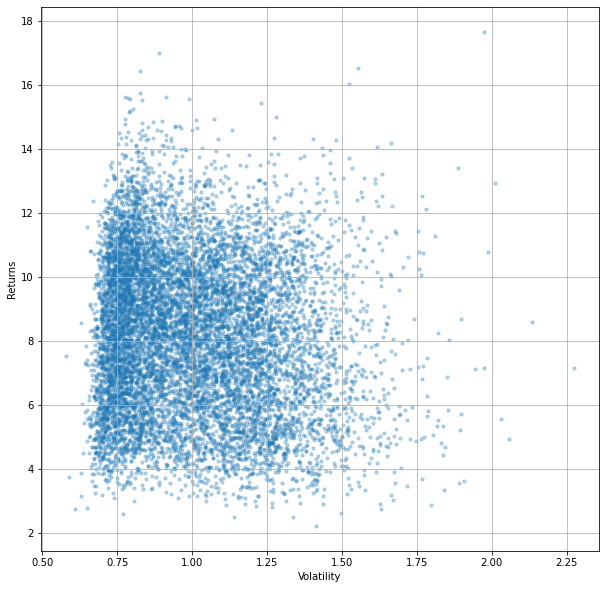

In [72]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

### How to read the Efficient Frontier?
Each point on the line (left edge) represents an optimal portfolio of stocks that maximises the returns for any given level of risk.

The point (portfolios) in the interior are sub-optimal for a given risk level. For every interior point, there is another that offers higher returns for the same risk.

On this graph, you can also see the combination of weights that will give you all possible combinations:

1. Minimum volatility (left most point)
2. Maximum returns (top most point)

And everything in between.

In [73]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns             7.553468
Volatility          0.579591
MATIC-USD weight    0.090775
AVAX-USD weight     0.060354
DOGE-USD weight     0.084897
MIDAS-USD weight    0.041520
BNB-USD weight      0.084435
BTC-USD weight      0.254445
LINK-USD weight     0.011874
UNI-USD weight      0.008982
ADA-USD weight      0.075913
ETH-USD weight      0.029053
TSLA weight         0.257752
Name: 3241, dtype: float64

The minimum volatility is in a portfolio where the weights of Apple, Nike, Google and Amazon are 26%, 39%, 30% and 4% respectively. This point can be plotted on the efficient frontier graph as shown:

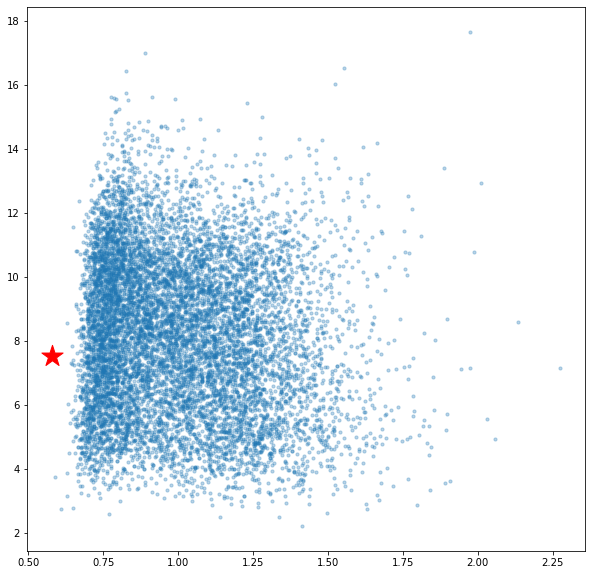

In [74]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The red star denotes the most efficient portfolio with minimum volatility.

It is worthwhile to note that any point to the right of efficient frontier boundary is a sup-optimal portfolio.

We found the portfolio with minimum volatility, but you will notice that the return on this portfolio is pretty low. Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.

### The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?
This is done by using a parameter called the Sharpe Ratio.

Sharpe Ratio
The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

The optimal risky portfolio is the one with the highest Sharpe ratio.

![sharpe formula](image/Sharpe-Ratio-300x149.jpg)





## Part 3: Optimal Risky Portfolio
An optimal risky portfolio can be considered as one that has highest Sharpe ratio.

Let’s find out.

In [75]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port.to_csv('optimal_portfolio.csv')
optimal_risky_port


Returns             15.633166
Volatility           0.774430
MATIC-USD weight     0.251579
AVAX-USD weight      0.132516
DOGE-USD weight      0.056931
MIDAS-USD weight     0.014639
BNB-USD weight       0.008838
BTC-USD weight       0.175276
LINK-USD weight      0.039622
UNI-USD weight       0.023720
ADA-USD weight       0.135270
ETH-USD weight       0.062653
TSLA weight          0.098958
Name: 8321, dtype: float64

In [76]:
# sort the assets by their weights in the optimal portfolio in deceasing order
sorted_weights = optimal_risky_port.drop(['Returns', 'Volatility']).sort_values(ascending=False)

In [ ]:
# Show dollar amount to invest in each asset based on capital available
#sorted_weights.multiply(capital, '$, .2f')

In [77]:
# add the $ symbol to the weights
dollarAllocations = sorted_weights.apply(lambda x: '$' + str(round(x*capital,2)))
dollarAllocations


MATIC-USD weight    $2515.79
BTC-USD weight      $1752.76
ADA-USD weight       $1352.7
AVAX-USD weight     $1325.16
TSLA weight          $989.58
ETH-USD weight       $626.53
DOGE-USD weight      $569.31
LINK-USD weight      $396.22
UNI-USD weight        $237.2
MIDAS-USD weight     $146.39
BNB-USD weight        $88.38
Name: 8321, dtype: object

In [ ]:
# # Create a dataframe with the weights of each asset multiplied by the adjusted closing price of the asset over the last 5 years
# asset_value = pd.DataFrame() # Create an empty dataframe
# for asset in sorted_weights.index:
#     asset_value[asset] = df[asset]*sorted_weights[asset]
# asset_value.head()
# test test test 




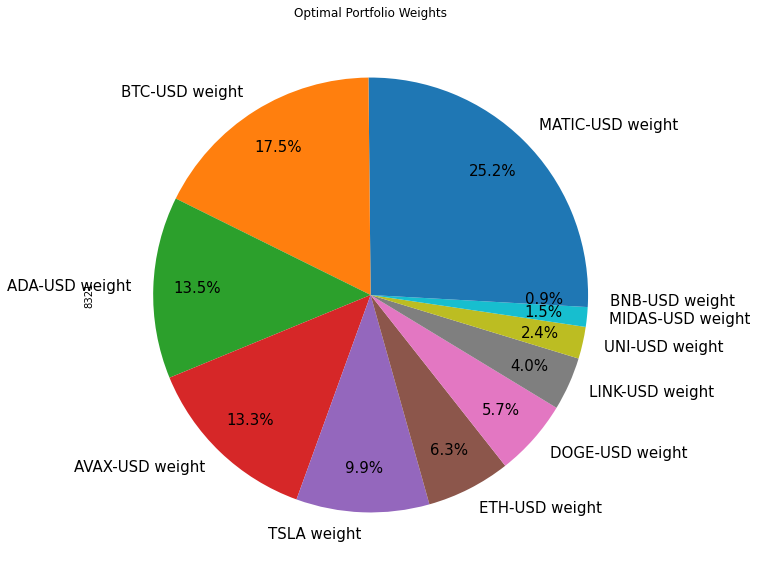

In [78]:
# Create a pie chart of the weights of the assets in the optimal portfolio
plt.sorted_weights = sorted_weights.plot.pie(figsize=[10,10], title='Optimal Portfolio Weights', fontsize=15, autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)

In [ ]:
# Create a for loop to determine the optimal number of assets to include in the portfolio
# This will be done by creating a list of the number of assets to include in the portfolio
# and then creating a for loop that will run through the list and create a portfolio for each number of assets
# in the list. The portfolio with the highest return will be selected as the optimal portfolio.


# Create a list of the number of assets to include in the portfolio
# num_assets_list = []
# for i in range(1, len(tickers)+1):
#     num_assets_list.append(i)
# print(num_assets_list)


You can notice that while the difference in risk between minimum volatility portfolio and optimal risky portfolio is just 6%, the difference in returns is a whopping 17%.
We can plot this point too on the graph of efficient frontier.

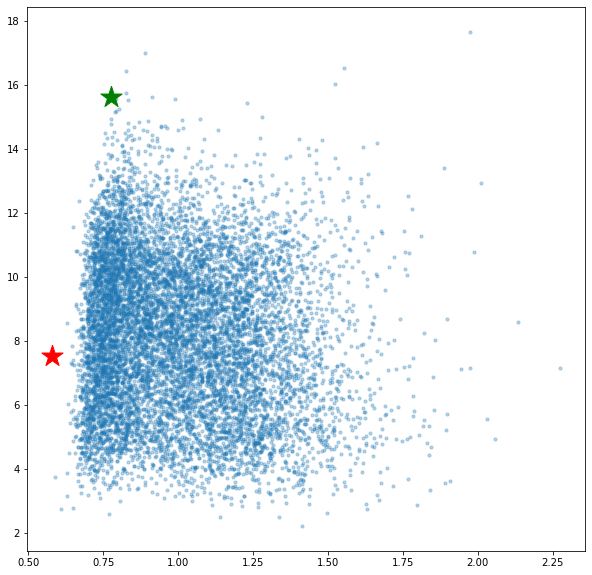

In [79]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

The green star represents the optimal risky portfolio.

References
- Video series by Finquest (https://www.youtube.com/watch?v=Mb4H3MaJnl8&list=PLLVfjXL2pnkQQXmBMPu_NIst57AKak5Z1)
- Investopedia (https://www.investopedia.com/terms/p/portfoliomanagement.asp)